In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

In [4]:
PATH = 'C:/Users/davin/Downloads/서울시 불법주정차 단속/'

gangnam = PATH + '강남구.csv'
gangdong = PATH + '강동구.csv'
gangbuk = PATH + '강북구.csv'
gangseo = PATH + '강서구.csv'
gwanak = PATH + '관악구.csv'
gwangjin = PATH + '광진구.csv'
guro = PATH + '구로구.csv'
geumcheon = PATH + '금천구.csv'
nowon = PATH + '노원구.csv'
dobong = PATH + '도봉구.csv'
dongdaemun = PATH + '동대문구.csv'
dongjak = PATH + '동작구.csv'
mapo = PATH + '마포구.csv'
seodaemun = PATH + '서대문구.csv'
seocho = PATH + '서초구.csv'
seongbuk = PATH + '성북구.csv'
yangcheon = PATH + '양천구.csv'
yeongduengpo = PATH + '영등포구.csv'
yongsan = PATH + '용산구.csv'
eunpyeong = PATH + '은평구.csv'
jungrang = PATH + '중랑구.csv'

In [5]:
gangnam_df    = pd.read_csv(gangnam, encoding='cp949')
gangdong_df   = pd.read_csv(gangdong, encoding='cp949')
gangbuk_df    = pd.read_csv(gangbuk, encoding='cp949')
gangseo_df    = pd.read_csv(gangseo, encoding='cp949')
gwanak_df     = pd.read_csv(gwanak, encoding='cp949')
gwangjin_df   = pd.read_csv(gwangjin, encoding='cp949')
guro_df       = pd.read_csv(guro, encoding='cp949')
geumcheon_df  = pd.read_csv(geumcheon, encoding='cp949')
nowon_df      = pd.read_csv(nowon, encoding='cp949')
dobong_df     = pd.read_csv(dobong, encoding='cp949')
dongdaemun_df = pd.read_csv(dongdaemun, encoding='cp949')
dongjak_df    = pd.read_csv(dongjak, encoding='cp949')
mapo_df       = pd.read_csv(mapo, encoding='cp949')
seodaemun_df  = pd.read_csv(seodaemun, encoding='cp949')
seocho_df     = pd.read_csv(seocho, encoding='cp949')
seongbuk_df   = pd.read_csv(seongbuk, encoding='cp949')
yangcheon_df  = pd.read_csv(yangcheon, encoding='cp949')
yeongduengpo_df = pd.read_csv(yeongduengpo, encoding='cp949')
yongsan_df    = pd.read_csv(yongsan, encoding='cp949')
eunpyeong_df  = pd.read_csv(eunpyeong, encoding='cp949')
jungrang_df   = pd.read_csv(jungrang, encoding='cp949')

In [12]:
print('강남', gangnam_df.columns)
print('강동', gangdong_df.columns)
print('강북', gangbuk_df.columns)
print('강서', gangseo_df.columns)
print('관악', gwanak_df.columns)
print('광진', gwangjin_df.columns)
print('구로', guro_df.columns)
print('금천', geumcheon_df.columns)
print('노원', nowon_df.columns)
print('도봉', dobong_df.columns)
print('동대문', dongdaemun_df.columns)
print('동작', dongjak_df.columns)
print('마포', mapo_df.columns)
print('서대문', seodaemun_df.columns)
print('서초', seocho_df.columns)
print('성북', seongbuk_df.columns)
print('양천', yangcheon_df.columns)
print('영등포', yeongduengpo_df.columns)
print('용산', yongsan_df.columns)
print('은평', eunpyeong_df.columns)
print('중랑', jungrang_df.columns)

강남 Index(['연도', '동명', '부과건수', '견인건수', '단속원금(원)', '데이터기준일자'], dtype='object')
강동 Index(['단속동', '단속건수', '기준일자'], dtype='object')
강북 Index(['연도', '통계기준', '견인건수', '단속건수', '단속원금(원)'], dtype='object')
강서 Index(['단속년도', '시군구명', '행정동명', '과태료명', '단속건수'], dtype='object')
관악 Index(['기관', '과태료명', '단속년월', '단속건수', '단속원금'], dtype='object')
광진 Index(['단속일시', '단속원금', '단속동', '단속장소', '위반내용', '견인지시', '데이터기준일자'], dtype='object')
구로 Index(['단속연도', '단속동', '단속건수', '단속금액', '견인건수'], dtype='object')
금천 Index(['단속연월', '단속건수(건)'], dtype='object')
노원 Index(['단속일시', '단속원금', '단속동', '단속장소', '위반내용', '견인지시', '관리부서', '기준일자'], dtype='object')
도봉 Index(['연도', '도봉동', '방학동', '쌍문동', '창동'], dtype='object')
동대문 Index(['월_년', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년',
       '2018년', '2019년', '2020년', '2021년'],
      dtype='object')
동작 Index(['구분', '계', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월',
       '11월', '12월'],
      dtype='object')
마포 Index(['시도명', '시군구명', '단속년월', '단속건수', '데이터기준일', 'U

In [34]:
# gangnam_df
# ok

# gangdong_df
# 2020년 자료밖에 없음

# gangbuk_df
# ok

# gangseo_df
# ok

# gwanak_df
# ok

# gwangjin_df
# ok

# guro_df
# ok

# geumcheon_df
# ok

# nowon_df
# ok

# dobong_df
#2017-18년도 밖에 없음

# dongdaemun_df
# ok

# dongjak_df
# ok

# mapo_df
# ok

# seodaemun_df
# 상세정보뿐, 년도/건수가 없음

# seocho_df
# ok

# seongbuk_df
# ok

# yangcheon_df
# cctv 설치 개수임 

# yeongduengpo_df
# ok

# yongsan_df
# ok

# eunpyeong_df
# ok

# jungrang_df
# ok

,시도명,시군구명,단속년월,단속건수
0,서울특별시,중랑구,2011-01,2560
1,서울특별시,중랑구,2011-02,3854
2,서울특별시,중랑구,2011-03,5789
3,서울특별시,중랑구,2011-04,4362
4,서울특별시,중랑구,2011-05,3913
...,...,...,...,...
127,서울특별시,중랑구,2021-08,3370
128,서울특별시,중랑구,2021-09,3113
129,서울특별시,중랑구,2021-10,3541
130,서울특별시,중랑구,2021-11,3660


In [52]:
gangbuk_df[['연도', '단속건수']]

,연도,단속건수
0,2021,1139
1,2021,18606
2,2021,3
3,2021,2
4,2021,1
...,...,...
75,2017,4171
76,2017,20603
77,2017,6
78,2017,1037


In [51]:
gangbuk_his = {}
for i in range(len(set(gangbuk_df['연도']))):
    gangbuk_his[list(set(gangbuk_df['연도']))[i]] = sum(gangbuk_df.loc[gangbuk_df['연도'] == list(set(gangbuk_df['연도']))[i], '단속건수'])

gangbuk_his

{2017: 61815, 2018: 49366, 2019: 59384, 2020: 52906, 2021: 53297}

<BarContainer object of 5 artists>

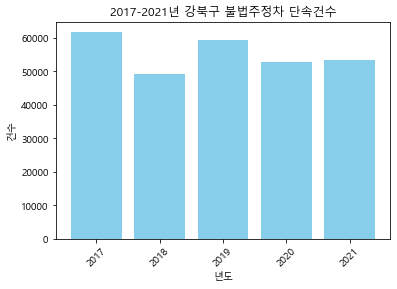

In [53]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2017-2021년 강북구 불법주정차 단속건수')
plt.xlabel('년도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.bar(gangbuk_his.keys(), gangbuk_his.values(), color='skyblue')

In [60]:
gwanak_df['단속년월'] = pd.to_datetime(gwanak_df['단속년월'])
gwanak_df['단속년'] = gwanak_df['단속년월'].dt.year

gwanak_his = {}
for i in range(len(set(gwanak_df['단속년']))):
    gwanak_his[list(set(gwanak_df['단속년']))[i]] = sum(gwanak_df.loc[gwanak_df['단속년'] == list(set(gwanak_df['단속년']))[i], '단속건수'])

gwanak_his

{2019: 108398, 2020: 84702, 2021: 89526}

<BarContainer object of 3 artists>

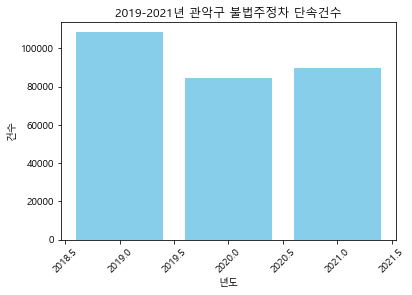

In [61]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2019-2021년 관악구 불법주정차 단속건수')
plt.xlabel('년도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.bar(gwanak_his.keys(), gwanak_his.values(), color='skyblue')

In [75]:
gwangjin_df

,단속일시,단속원금,단속동,단속장소,위반내용,견인지시,데이터기준일자,단속년도
0,2015-01-01 06:44:00,40000,화양동,119-4,주정차금지,견인처리,2022-06-10,2015
1,2015-01-01 07:01:00,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10,2015
2,2015-01-01 07:24:00,50000,구의동,동서울터미널 주차장앞,32조내지 34조위반,미견인,2022-06-10,2015
3,2015-01-01 08:00:00,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10,2015
4,2015-01-01 08:15:00,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10,2015
...,...,...,...,...,...,...,...,...
473069,2022-05-31 21:32:00,40000,구의동,지너스타워 주차장 앞,횡단보도,미견인,2022-06-10,2022
473070,2022-05-31 21:46:00,40000,구의동,서울특별시 광진구 자양로22길 24,횡단보도,미견인,2022-06-10,2022
473071,2022-05-31 21:46:00,40000,구의동,서울특별시 광진구 구의로16길 30,교통소통장애,미견인,2022-06-10,2022
473072,2022-05-31 22:51:00,40000,광장동,328-2,보도,미견인,2022-06-10,2022


In [85]:
gwangjin_df['단속일시'] = pd.to_datetime(gwangjin_df['단속일시'])
gwangjin_df['단속년도'] = gwangjin_df['단속일시'].dt.year
gwangjin_his = {}
for i in range(len(set(gwangjin_df['단속년도']))):
    gwangjin_his[list(set(gwangjin_df['단속년도']))[i]] = len(gwangjin_df[gwangjin_df['단속년도'] == list(set(gwangjin_df['단속년도']))[i]])
    
gwangjin_his

{2016: 67621,
 2017: 69991,
 2018: 65633,
 2019: 61281,
 2020: 60545,
 2021: 58757,
 2022: 21875,
 2015: 67371}

<BarContainer object of 8 artists>

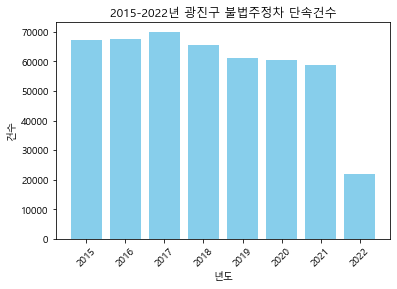

In [87]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2015-2022년 광진구 불법주정차 단속건수')
plt.xlabel('년도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.bar(gwangjin_his.keys(), gwangjin_his.values(), color='skyblue')

In [89]:
guro_df[['단속연도', '단속건수']]

,단속연도,단속건수
0,2017,8241
1,2017,9011
2,2017,10533
3,2017,13471
4,2017,11742
...,...,...
64,2022,8652
65,2022,7584
66,2022,6178
67,2022,1562


In [90]:
guro_his = {}
for i in range(len(set(guro_df['단속연도']))):
    guro_his[list(set(guro_df['단속연도']))[i]] = sum(guro_df.loc[guro_df['단속연도'] == list(set(guro_df['단속연도']))[i], '단속건수'])
    
guro_his

{2017: 106147, 2018: 99485, 2019: 88986, 2020: 69558, 2021: 65096, 2022: 70155}

<BarContainer object of 6 artists>

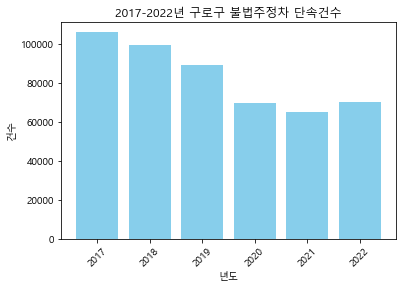

In [105]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2017-2022년 구로구 불법주정차 단속건수')
plt.xlabel('년도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.bar(guro_his.keys(), guro_his.values(), color='skyblue')

In [92]:
geumcheon_df

,단속연월,단속건수(건)
0,2011-01,2382
1,2011-02,3296
2,2011-03,4467
3,2011-04,3671
4,2011-05,3525
...,...,...
127,2021-08,3631
128,2021-09,4366
129,2021-10,3884
130,2021-11,4362


In [95]:
geumcheon_df['단속연월'] = pd.to_datetime(geumcheon_df['단속연월'])
geumcheon_df['단속년도'] = geumcheon_df['단속연월'].dt.year
geumcheon_his = {}
for i in range(len(set(geumcheon_df['단속년도']))):
    geumcheon_his[list(set(geumcheon_df['단속년도']))[i]] = sum(geumcheon_df.loc[geumcheon_df['단속년도'] == list(set(geumcheon_df['단속년도']))[i], '단속건수(건)'])
    
geumcheon_his

{2016: 66446,
 2017: 56800,
 2018: 55895,
 2019: 59890,
 2020: 53490,
 2021: 52403,
 2011: 41214,
 2012: 49320,
 2013: 48492,
 2014: 48201,
 2015: 44570}

<BarContainer object of 11 artists>

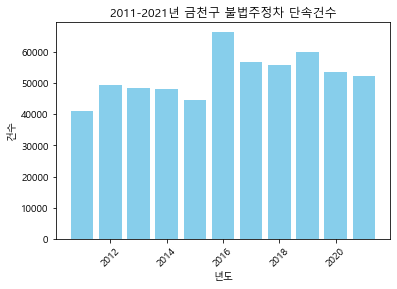

In [104]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2011-2021년 금천구 불법주정차 단속건수')
plt.xlabel('년도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.bar(geumcheon_his.keys(), geumcheon_his.values(), color='skyblue')

In [99]:
yongsan_df[['단속일시']]

,단속일시
0,2015-01-01 00:00
1,2015-01-01 00:00
2,2015-01-01 00:01
3,2015-01-01 00:01
4,2015-01-01 00:02
...,...
544142,2021-06-11 20:43
544143,2021-06-11 21:07
544144,2021-06-11 21:07
544145,2021-06-11 21:31


In [101]:
yongsan_df['단속일시'] = pd.to_datetime(yongsan_df['단속일시'])
yongsan_df['단속년도'] = yongsan_df['단속일시'].dt.year
yongsan_his = {}
for i in range(len(set(yongsan_df['단속년도']))):
    yongsan_his[list(set(yongsan_df['단속년도']))[i]] = len(yongsan_df[yongsan_df['단속년도'] == list(set(yongsan_df['단속년도']))[i]])
    
yongsan_his

{2016: 87365,
 2017: 94040,
 2018: 96816,
 2019: 66385,
 2020: 71745,
 2021: 33445,
 2015: 94351}

<BarContainer object of 7 artists>

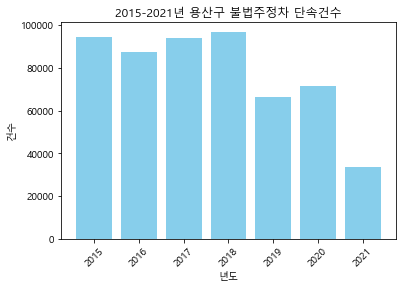

In [106]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2015-2021년 용산구 불법주정차 단속건수')
plt.xlabel('년도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.bar(yongsan_his.keys(), yongsan_his.values(), color='skyblue')

In [108]:
eunpyeong_df[['단속년월','단속건수']]

,단속년월,단속건수
0,200101,"4,465"
1,200102,"5,239"
2,200103,"6,502"
3,200104,"5,232"
4,200105,"6,230"
...,...,...
247,202108,"5,000"
248,202109,"4,362"
249,202110,"5,189"
250,202111,"5,430"


In [109]:
eunpyeong_df['단속년월'] = pd.to_datetime(eunpyeong_df['단속년월'])
eunpyeong_df['단속년도'] = eunpyeong_df['단속년월'].dt.year
eunpyeong_his = {}
for i in range(len(set(eunpyeong_df['단속년도']))):
    eunpyeong_his[list(set(eunpyeong_df['단속년도']))[i]] = sum(eunpyeong_df.loc[eunpyeong_df['단속년도'] == list(set(eunpyeong_df['단속년도']))[i], '단속건수'])
    
eunpyeong_his

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2015-2022년 은평구 불법주정차 단속건수')
plt.xlabel('년도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.bar(yongsan_his.keys(), yongsan_his.values(), color='skyblue')

In [111]:
jungrang_df[['단속년월', '단속건수']]

,단속년월,단속건수
0,2011-01,2560
1,2011-02,3854
2,2011-03,5789
3,2011-04,4362
4,2011-05,3913
...,...,...
127,2021-08,3370
128,2021-09,3113
129,2021-10,3541
130,2021-11,3660


In [112]:
jungrang_df['단속년월'] = pd.to_datetime(jungrang_df['단속년월'])
jungrang_df['단속년도'] = jungrang_df['단속년월'].dt.year
jungrang_his = {}
for i in range(len(set(jungrang_df['단속년도']))):
    jungrang_his[list(set(jungrang_df['단속년도']))[i]] = sum(jungrang_df.loc[jungrang_df['단속년도'] == list(set(jungrang_df['단속년도']))[i], '단속건수'])
    
jungrang_his

{2016: 64912,
 2017: 59402,
 2018: 48969,
 2019: 48284,
 2020: 39378,
 2021: 39597,
 2011: 52312,
 2012: 75359,
 2013: 62393,
 2014: 62490,
 2015: 59217}

<BarContainer object of 11 artists>

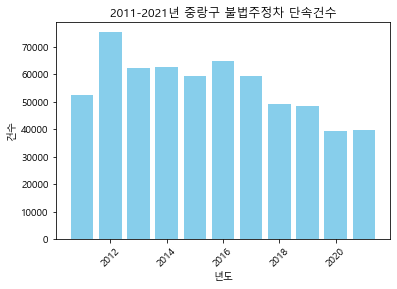

In [115]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2011-2021년 중랑구 불법주정차 단속건수')
plt.xlabel('년도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.bar(jungrang_his.keys(), jungrang_his.values(), color='skyblue')

In [146]:
gangnam_df[['연도','부과건수']]

,연도,부과건수
0,2017,9409
1,2017,71771
2,2017,55222
3,2017,10763
4,2017,36472
...,...,...
61,2021,8106
62,2021,37982
63,2021,6028
64,2021,1967


In [147]:
gangnam_his = {}
for i in range(len(set(gangnam_df['연도']))):
    gangnam_his[list(set(gangnam_df['연도']))[i]] = sum(gangnam_df.loc[gangnam_df['연도'] == list(set(gangnam_df['연도']))[i], '부과건수'])
    
gangnam_his

{2017: 404833, 2018: 293596, 2019: 289884, 2020: 166845, 2021: 192164}

In [150]:
print(sorted(gangnam_his.items()))
print(sorted(gangbuk_his.items()))
print(sorted(guro_his.items())[:5])
print(sorted(geumcheon_his.items())[6:])
print(sorted(yongsan_his.items())[2:])
print(sorted(jungrang_his.items())[6:])

[(2017, 404833), (2018, 293596), (2019, 289884), (2020, 166845), (2021, 192164)]
[(2017, 61815), (2018, 49366), (2019, 59384), (2020, 52906), (2021, 53297)]
[(2017, 106147), (2018, 99485), (2019, 88986), (2020, 69558), (2021, 65096)]
[(2017, 56800), (2018, 55895), (2019, 59890), (2020, 53490), (2021, 52403)]
[(2017, 94040), (2018, 96816), (2019, 66385), (2020, 71745), (2021, 33445)]
[(2017, 59402), (2018, 48969), (2019, 48284), (2020, 39378), (2021, 39597)]


In [151]:
print(gangnam_his[2017] + gangbuk_his[2017] + guro_his[2017] + geumcheon_his[2017] + yongsan_his[2017] + jungrang_his[2017])
print(gangnam_his[2018] + gangbuk_his[2018] + guro_his[2018] + geumcheon_his[2018] + yongsan_his[2018] + jungrang_his[2018])
print(gangnam_his[2019] + gangbuk_his[2019] + guro_his[2019] + geumcheon_his[2019] + yongsan_his[2019] + jungrang_his[2019])
print(gangnam_his[2020] + gangbuk_his[2020] + guro_his[2020] + geumcheon_his[2020] + yongsan_his[2020] + jungrang_his[2020])
print(gangnam_his[2021] + gangbuk_his[2021] + guro_his[2021] + geumcheon_his[2021] + yongsan_his[2021] + jungrang_his[2021])

783037
644127
612813
453922
436002


<BarContainer object of 5 artists>

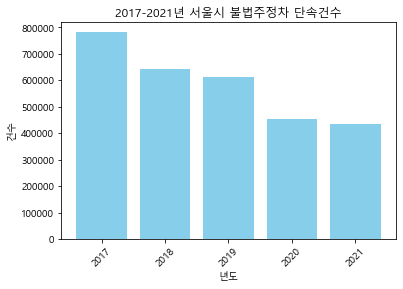

In [152]:
seoul_yesi = {2017:783037,2018:644127,2019:612813,2020:453922,2021:436002}
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('2017-2021년 서울시 불법주정차 단속건수')
plt.xlabel('년도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.bar(seoul_yesi.keys(), seoul_yesi.values(), color='skyblue')

In [154]:
print(len(gangnam_df))
print(len(gangdong_df))
print(len(gangbuk_df))
print(len(gangseo_df))
print(len(gwanak_df))
print(len(gwangjin_df))
print(len(guro_df))
print(len(geumcheon_df))
print(len(nowon_df))
print(len(dobong_df))
print(len(dongdaemun_df))
print(len(dongjak_df))
print(len(mapo_df))
print(len(seodaemun_df))
print(len(seocho_df))
print(len(seongbuk_df))
print(len(yangcheon_df))
print(len(yeongduengpo_df))
print(len(yongsan_df))
print(len(eunpyeong_df))
print(len(jungrang_df))

66
9
80
120
36
473074
69
132
524376
2
12
6
144
44659
132
132
104
52
544147
252
132
